In [6]:
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy as cpy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



data_path = './data'
targets = ['retentionN', 'retentionP']


def get_data(for_training=False):
    with open(os.path.join(data_path, 'MLDatabase2.csv'), 'r') as data_file:
        df = pd.read_csv(data_file)

    if for_training:
        df = df.dropna(subset=targets)  # if no target, drop
        df = df.drop(['sort', 'catchment', 'sampling', 'date', 'time', 'code', 'cation', 'no3rank'], axis=1)
        return df

    else:
        return df
    
    
def get_folds(data, k):
    unique_sites = set(data['site'])  # get unique sites
    kfolds_sites = np.array_split(list(unique_sites), k)  # split sites into k
    kfolds = [data.loc[data['site'].isin(vals)] for vals in kfolds_sites]  # get k separate dataframes

    for fold in kfolds:
        fold = fold.drop(['site'], axis=1)
        
    return kfolds


In [7]:
data = get_data(for_training=True)

In [8]:
data.head()

,site,lat,long,area,Agri,Artif,For,Water,PMother,PMgranite,PMmica,PMschiste,LENGTH,TNPS,TPPS,perWet,Relief,Slope,SurplusN,SurplusP,RiverD,PSNha,PSPha,FNha,Qmm,QNov2015,QMar2016,QJune2018,retentionN,FPha,retentionP,DOChistoric,DOCslope,DSIhistoric,DSIslope,NO3historic,NO3slope,PO4historic,PO4slope,TPhistoric,TPslope,cond,ph,temp,turb,o2,radon,mrp,tp,op,doc,don,bdoc,Cl,NO2,DOC.DON,d15N.NO3,d18O.NO3,NH4,SO4,Li,Be,B,Na,Mg,Al,Si,K,Ca,Sc,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,As,Rb,Sr,Y,Cd,Sb,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Pb,Th,U,ce.ce,SREE,LaN,CeN,PrN,NdN,SmN,EuN,GdN,TbN,DyN,HoN,ErN,TmN,YbN,LuN,X.La.Sm.N,X.Gd.Yb.N,X.La.Yb.N,N.NO3,TOC,doc.scan,sac254,suva,doc.dop,NO3.Cl,MRP,TP,SpecRatio,no3n,no2n,tn,mrt,docno3,log_radon,log_docno3,no3.r,mrp.r
0,HC1,48.3129,-1.4310,37299,88.186697,5.973532,5.839770,0.0,8.824149,33.484270,0.0,55.824653,443448.617300,15902.52814,2893.96428,0.249611,37.571590,4.804981,56.884440,20.458408,1.188900,0.426353,0.077588,19.778893,273.830127,0.283454,2.320832,1.351793,0.652297,0.440102,0.978488,5.050758,0.000000,0.000000,0.000000,34.000000,0.000000,0.441928,-0.000047,0.239857,-0.000016,374.0,7.03,11.9,6.58,9.46,1420.90,0.07252,0.08899,0.01647,4.39,0.056,7.908929,42.190,0.087,78.581,9.96,6.28,0.000,33.154,8.644,0.006,25.768,35185.0,9130.0,12.76,9.518,7455.0,24617.0,0.141,0.804,0.249,39.62,205.72,0.484,7.107,1.508,8.185,0.014,1.205,4.868,95.593,0.094,0.0368,0.178,26.20,0.0546,0.0970,0.0146,0.0637,0.0169,0.0056,0.0375,0.0026,0.0153,0.0033,0.0099,0.0013,0.0094,0.0015,0.1511,0.0055,0.0728,0.781,0.333,0.000002,0.000002,0.000002,0.000002,0.000004,0.000006,0.000010,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000005,0.483,2.308,0.426,5.64,6.13,3.62,13.43,3.061597,266.346537,0.639,4.06,14.31,1.115801,6.093878,0.026492,6.176370,25.081818,0.720395,7.259749,0.542554,-0.708254,0.019512
1,HC2,48.2984,-1.3758,32539,87.387865,6.487356,6.124779,0.0,9.936153,26.371329,0.0,61.551946,381885.867900,14922.13992,2717.78594,0.250848,38.135092,4.834034,57.632233,21.226474,1.173630,0.458592,0.083524,19.778893,273.830127,0.283454,2.320832,1.351793,0.656808,0.440102,0.979266,5.050758,0.000000,0.000000,0.000000,34.000000,0.000000,0.441928,-0.000047,0.239857,-0.000016,391.0,7.44,12.8,7.65,9.12,1181.30,0.07408,0.08865,0.01457,4.20,1.209,9.939588,43.262,0.081,3.475,10.97,6.46,0.000,38.039,10.090,0.007,26.460,36172.0,9731.0,12.15,9.648,7663.0,27792.0,0.158,0.845,0.289,61.14,189.03,0.665,7.589,1.454,9.757,0.015,1.210,5.144,101.150,0.085,0.0339,0.179,27.22,0.0476,0.0852,0.0130,0.0561,0.0149,0.0054,0.0328,0.0023,0.0136,0.0028,0.0085,0.0013,0.0079,0.0014,0.1351,0.0046,0.0716,0.779,0.293,0.000002,0.000001,0.000002,0.000002,0.000003,0.000006,0.000009,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.480,2.411,0.443,5.83,6.21,6.54,13.02,3.098451,288.315243,0.659,4.07,14.31,1.153678,6.445379,0.024665,7.679043,25.672727,0.651630,7.075217,0.501762,-0.286627,0.021212
23,HR16,48.2468,-2.0095,1818,83.624471,1.707989,14.667540,0.0,0.000000,0.000000,0.0,100.000000,15848.368320,405.33118,65.79132,0.258478,9.857602,2.500095,52.861310,26.989426,0.871747,0.222954,0.036189,6.134280,162.265893,0.045711,1.136558,0.623671,0.883955,0.438034,0.983770,4.601672,0.000513,0.000000,0.000000,38.857466,-0.003604,0.220000,0.000000,0.230847,-0.000011,520.0,7.17,11.6,11.63,1.46,655.96,0.08945,0.11806,0.02861,9.87,1.127,26.313214,58.241,0.132,8.760,21.53,0.80,0.067,30.514,3.221,0.005,35.575,37194.0,11124.0,4.90,2.499,10042.0,43933.0,0.037,0.227,0.088,1407.81,764.97,1.828,8.972,0.582,1.080,0.018,2.730,4.034,129.459,0.075,0.0031,0.162,27.14,0.0513,0.1064,0.0139,0.0612,0.0136,0.0048,0.0238,0.0020,0.0131,0.0027,0.0075,0.0011,0.0076,0.0012,0.0772,0.0122,0.2879,0.905,0.310,0.000002,0.000002,0.000002,0.000002,0.000003,0.000005,0.000006,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003,0.000004,0.565,1.824,0.498,3.07,11.75,7.81,29.46,2.985078,344.969229,0.011,4.09,14.48,0.981697,0.142543,0.040194,1.376737,-6.822727,69.242312,6.487623,4.251951,-6.259092,0

In [9]:
data.shape

(81, 141)

In [10]:
data.dtypes

site            object
lat            float64
long           float64
area             int64
Agri           float64
Artif          float64
For            float64
Water          float64
PMother        float64
PMgranite      float64
PMmica         float64
PMschiste      float64
LENGTH         float64
TNPS           float64
TPPS           float64
perWet         float64
Relief         float64
Slope          float64
SurplusN       float64
SurplusP       float64
RiverD         float64
PSNha          float64
PSPha          float64
FNha           float64
Qmm            float64
QNov2015       float64
QMar2016       float64
QJune2018      float64
retentionN     float64
FPha           float64
retentionP     float64
DOChistoric    float64
DOCslope       float64
DSIhistoric    float64
DSIslope       float64
NO3historic    float64
NO3slope       float64
PO4historic    float64
PO4slope       float64
TPhistoric     float64
TPslope        float64
cond           float64
ph             float64
temp       

In [12]:
data.isnull().sum()[data.isnull().sum() > 0]

PSNha          18
PSPha          18
QJune2018      18
DOChistoric     9
DOCslope        9
DSIhistoric     9
DSIslope        9
NO3historic     9
NO3slope        9
PO4historic     9
PO4slope        9
TPhistoric      9
TPslope         9
temp            3
radon          27
mrp             1
tp              1
op              1
don            27
bdoc           27
NO2            15
DOC.DON        27
NH4            27
Na              3
doc.dop         1
MRP            54
TP             54
no2n           15
tn             27
log_radon      27
mrp.r           1
dtype: int64

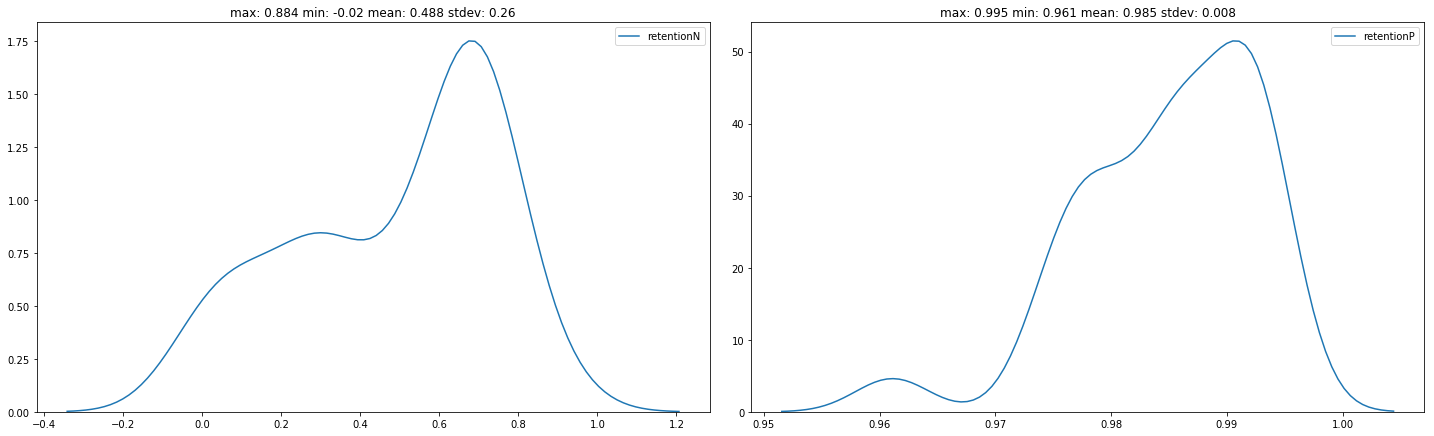

In [24]:
f, axarray = plt.subplots(ncols=2, nrows=1)
f.set_size_inches(20, 6)
f.tight_layout()

for target, ax in zip(targets, axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([ts[target].max(), 
                                              ts[target].min(), 
                                              ts[target].mean(), 
                                              ts[target].std()], 3)
    
    sb.kdeplot(ts[target].dropna(), ax=ax)
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))

    outliers = ts.loc[ts[target] > mean + 5*stdev, [target]]
    if not outliers.empty:
        print('{} outliers'.format(target))
        print(outliers)
        print()

In [29]:
corr = pd.DataFrame(index=xs.columns, columns=targets)

for target in targets:
    c = xs[xs.columns].corrwith(ts[target])
    corr[target] = c

corr.sort_values(by=['retentionN'], inplace=True)  # change retentionP if wanted
print(corr)

             retentionN  retentionP
QMar2016      -0.882353   -0.431945
FNha          -0.859038   -0.127119
Qmm           -0.854042   -0.381161
QNov2015      -0.831857   -0.436274
PMgranite     -0.658175   -0.726203
FPha          -0.630587   -0.601969
Slope         -0.563491   -0.543874
radon         -0.547000   -0.234692
Al            -0.517345   -0.292808
Be            -0.515187   -0.489363
NO3historic   -0.490550    0.017413
NO3.Cl        -0.467271   -0.092122
TPhistoric    -0.450912   -0.223082
X.La.Sm.N     -0.415937   -0.097270
Relief        -0.400251   -0.409254
no3.r         -0.386919   -0.038451
RiverD        -0.356181   -0.599222
no3rank       -0.333115    0.040927
no3n          -0.315628    0.067462
log_radon     -0.300017   -0.229665
tn            -0.296758    0.063566
suva          -0.291722   -0.125263
PMother       -0.279054    0.093114
o2            -0.275282   -0.122659
Y             -0.274190   -0.117329
Zn            -0.266018    0.013979
Cd            -0.251118   -0

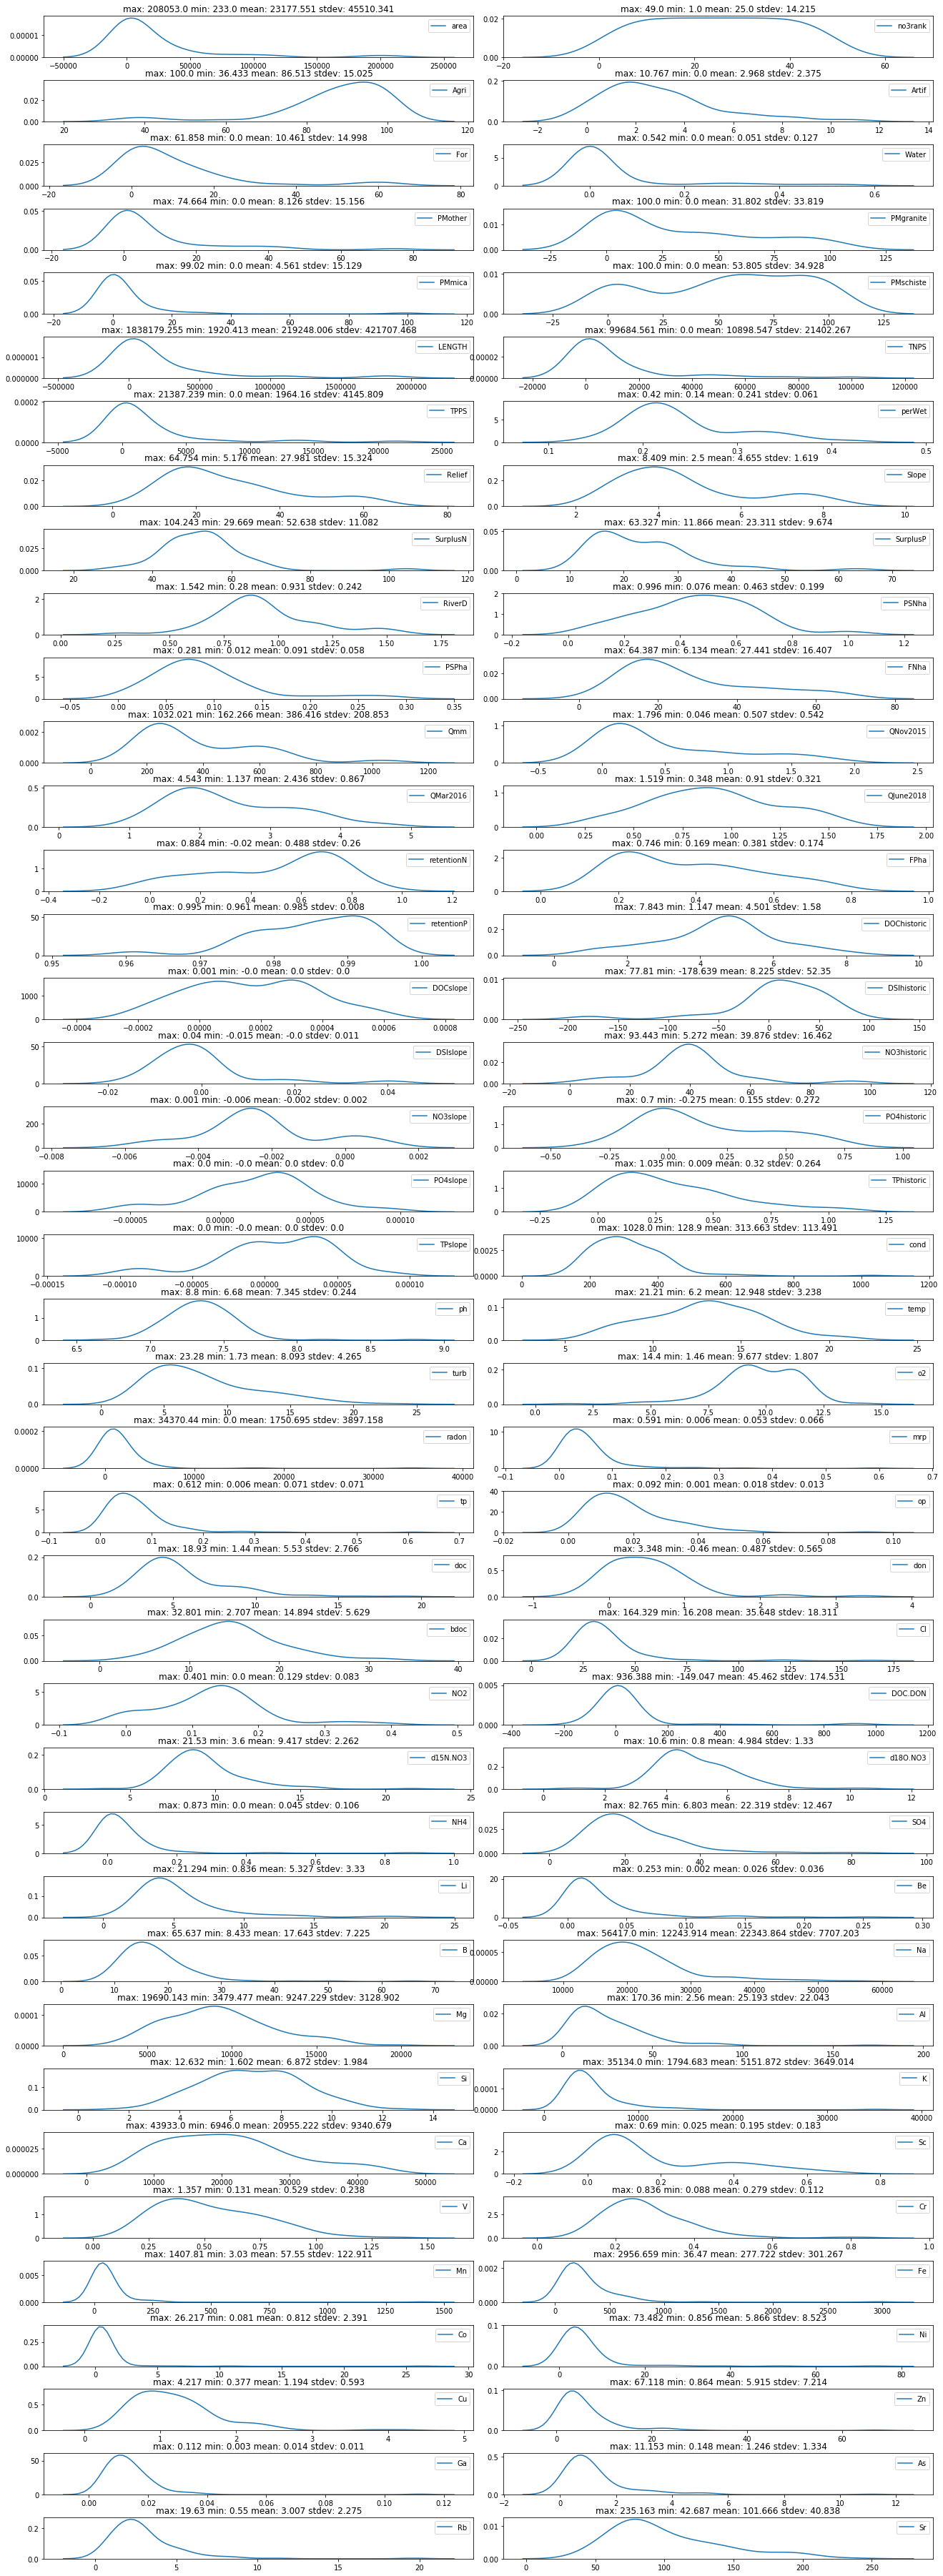

In [17]:
f, axarray = plt.subplots(ncols=2, nrows=40)
f.set_size_inches(18, 50)
f.tight_layout()

for col, ax in zip(data.columns[11:], axarray.ravel()):
    max_val, min_val, mean, stdev = np.round([data[col].max(), 
                                              data[col].min(), 
                                              data[col].mean(), 
                                              data[col].std()], 3)
    
    outliers = data.loc[data[col] > mean + 10*stdev, [col]]
    sb.kdeplot(data[col].dropna(), ax=ax)
    
    ax.set_title('max: {} min: {} mean: {} stdev: {}'.format(max_val, min_val, mean, stdev))
    
#     if not outliers.empty:
#         print('{} outliers'.format(col))
#         print(outliers)
#         print()